<a href="https://colab.research.google.com/github/yskim1230/AIB_Section2-PJT_Modeling-Plan/blob/main/Section_2_Project_modeling(tree_base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 트리모델

In [1]:
# 라이브러리 설치
# 원핫인코딩을 위해 category_encoders 라이브러리를 설치해줍니다.
!pip install category_encoders
!pip install pandas-profiling==3.1.0
# 해당 라이브러리 설치 후 런타임 다시 시작 -> 이후 셀 진행
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=2afeaf2842fa841e8c665c1456c10798c01d6e9bd53870d5a19bd480aaf670cb
  Stored in directory: /root/.cache/pip/whee

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import randint, uniform

데이터 불러오기

In [286]:
naver_shop = pd.read_csv('https://raw.githubusercontent.com/yskim1230/AIB_Section2-PJT_Modeling-Plan/main/naver_shop_FE_comp.csv')

In [288]:
naver_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              16426 non-null  object
 1   Low price          16426 non-null  int64 
 2   Mall Name          16426 non-null  object
 3   Product Type       16426 non-null  int64 
 4   Maker              16426 non-null  object
 5   Brand              16426 non-null  object
 6   category1          16426 non-null  object
 7   category2          16426 non-null  object
 8   category3          16426 non-null  object
 9   Price_range        16426 non-null  object
 10  Maker Point        16426 non-null  int64 
 11  Brand Point        16426 non-null  int64 
 12  Price_range_score  16426 non-null  int64 
 13  Total Point        16426 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.8+ MB


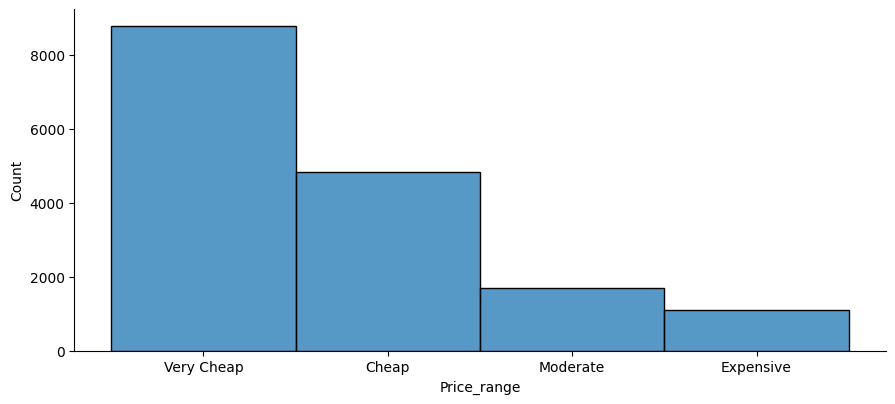

In [212]:
target ='Price_range'

import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.displot(naver_shop[target])
fig.fig.set_size_inches(10,4)

In [213]:
naver_shop[target].value_counts(normalize=True)

Very Cheap    0.535614
Cheap         0.294594
Moderate      0.102460
Expensive     0.067332
Name: Price_range, dtype: float64

In [214]:
major = naver_shop[target].mode()[0]
pred = [major] * len(naver_shop[target])

In [215]:
from sklearn.metrics import f1_score
import sklearn.metrics as metrics

# 기준모델의 평가지표
print("training accuracy: ", metrics.f1_score(naver_shop[target], pred,average ='weighted'))

training accuracy:  0.37363894291031574


In [216]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)

In [217]:
train.shape,test.shape

((11498, 14), (4928, 14))

In [221]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def divide_data(df):
    X = df.drop(['Price_range', 'Low price'], axis = 1)
    y = df['Price_range']
    return X, y

In [222]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

In [223]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(11498, 12) (11498,)
(4928, 12) (4928,)


In [224]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [225]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred,average='weighted')
    recall = recall_score(y_test, pred,average='weighted')
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))

In [226]:
import warnings
warnings.filterwarnings(action='ignore')

In [227]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

In [228]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import randint, uniform

def fit_rf(X_train, y_train):

    pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),  
    RandomForestClassifier(class_weight = "balanced", random_state=42)
    )
    dists = {
    'randomforestclassifier__max_depth' : randint(1, 30),
    'randomforestclassifier__max_features' : randint(1, 10),
    'randomforestclassifier__n_estimators' : randint(1, 300)
    }
    clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1,
    random_state = 42
    )

    clf.fit(X_train, y_train)
    print("Optimal Hyperparameter:", clf.best_params_)

    return clf

In [229]:
clf_rf = fit_rf(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Optimal Hyperparameter: {'randomforestclassifier__max_depth': 7, 'randomforestclassifier__max_features': 4, 'randomforestclassifier__n_estimators': 271}


In [232]:
pred_rf = clf_rf.predict(X_test)
get_clf_eval(y_test, pred_rf)
f1 = f1_score(y_test, pred_rf,average='weighted')
print('f1 score :', f1)

Confusion Matrix
[[ 969    0    0  483]
 [   0  183  149    0]
 [   0  211  294    0]
 [ 680    0    0 1959]]
정확도:0.6909496753246753, 정밀도:0.7020337890595111, 재현율:0.6909496753246753
f1 score : 0.6946013316368426


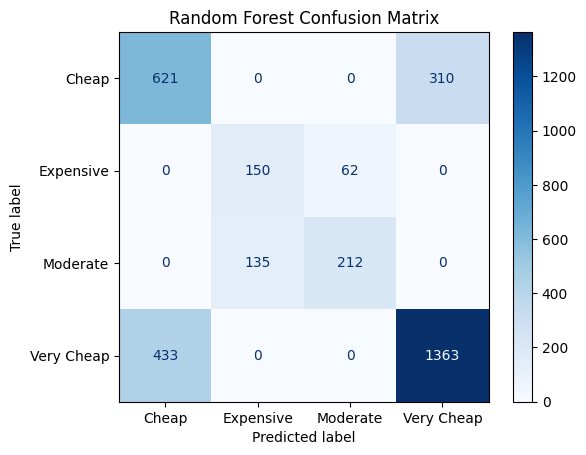

In [299]:
# 랜덤 포레스트 모델의 혼동 행렬을 그래프
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_rf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [233]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

In [234]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [238]:
from catboost import CatBoostClassifier

def fit_cb(X_train, y_train):
    # YOUR CODE HERE
    pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),  
    CatBoostClassifier(loss_function = 'MultiClass',class_weights=[0.619,0.818,0.916,0.953],early_stopping_rounds=35,verbose=100)
    )
    # YOUR CODE ENDS HERE
    pipe.fit(X_train, y_train)

    return pipe

In [239]:
clf_cb = fit_cb(X_train, y_train)

Learning rate set to 0.089622
0:	learn: 1.2597099	total: 39ms	remaining: 39s
100:	learn: 0.4971184	total: 3.18s	remaining: 28.3s
200:	learn: 0.4711228	total: 7.44s	remaining: 29.6s
300:	learn: 0.4543544	total: 10.1s	remaining: 23.4s
400:	learn: 0.4404047	total: 13.5s	remaining: 20.1s
500:	learn: 0.4294844	total: 17.1s	remaining: 17.1s
600:	learn: 0.4199668	total: 23s	remaining: 15.2s
700:	learn: 0.4104665	total: 26.8s	remaining: 11.4s
800:	learn: 0.4018178	total: 30.3s	remaining: 7.53s
900:	learn: 0.3940782	total: 32.4s	remaining: 3.56s
999:	learn: 0.3871084	total: 35.1s	remaining: 0us


In [242]:
pred_cb = clf_cb.predict(X_test)
get_clf_eval(y_test, pred_cb)
f1 = f1_score(y_test, pred_cb,average='weighted')
print('f1 score :', f1)

Confusion Matrix
[[ 614    0    0  838]
 [   0  127  205    0]
 [   0  145  360    0]
 [ 314    0    0 2325]]
정확도:0.695211038961039, 정밀도:0.685330882401562, 재현율:0.695211038961039
f1 score : 0.6784969265325614


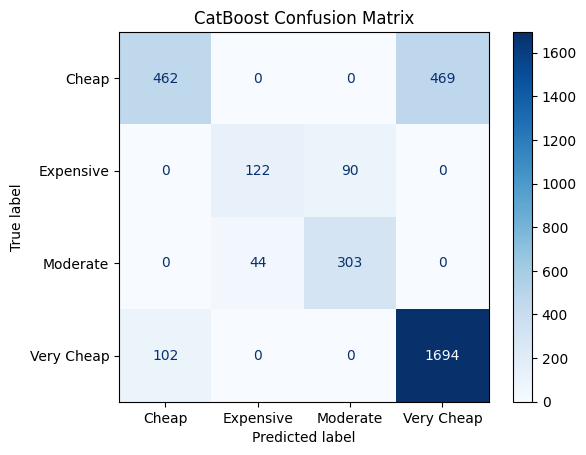

In [300]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_cb, X_test, y_test, cmap=plt.cm.Blues)
plt.title('CatBoost Confusion Matrix')
plt.show()

In [243]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [244]:
# XGBClassifier
from sklearn.utils import class_weight
from xgboost import XGBClassifier

def fit_xg(X_train, y_train):

    processor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median')
    )
    X_train_processed = processor.fit_transform(X_train)

    classes_weights = class_weight.compute_sample_weight(
        class_weight='balanced',
        y=y_train_encoded
    )
    
    clf = XGBClassifier(eval_metric='mlogloss',max_depth = 21,n_estimators = 190)
    clf.fit(X_train_processed, y_train_encoded, sample_weight=classes_weights)

    return clf

In [245]:
clf_xg = fit_xg(X_train, y_train)

In [246]:
processor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median')
    )
X_test_processed = processor.fit_transform(X_test)

pred_xg = clf_xg.predict(X_test_processed)

get_clf_eval(y_test_encoded, pred_xg)

f1 = f1_score(y_test_encoded, pred_xg,average='weighted')
print('f1 score :', f1)

Confusion Matrix
[[ 322    0    0 1130]
 [   0   59  273    0]
 [   0  116  389    0]
 [ 461    0    0 2178]]
정확도:0.5982142857142857, 정밀도:0.5566807481483583, 재현율:0.5982142857142857
f1 score : 0.5611423518794664


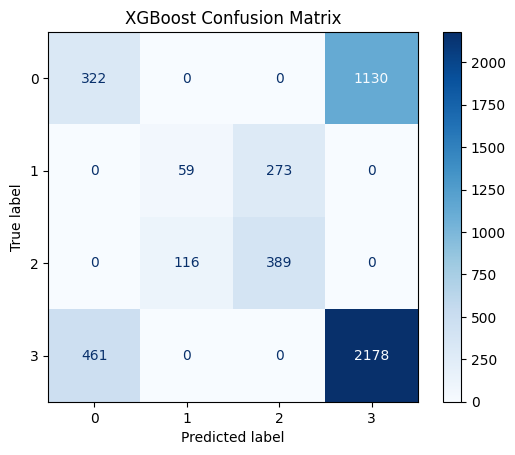

In [301]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_xg, X_test_processed, y_test_encoded, cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix')
plt.show()

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt
df_by_group = pd.DataFrame(columns=['model 1', 'f1'])

In [290]:
data_to_insert = {'model 1': 'baseline','f1': 0.37363}
df_by_group = df_by_group.append(data_to_insert, ignore_index=True)

In [291]:
data_to_insert = {'model 1': 'RandomForestClassifier','f1': 0.69460}
df_by_group = df_by_group.append(data_to_insert, ignore_index=True)

In [292]:
data_to_insert = {'model 1': 'CatBoostClassifier','f1': 0.67849}
df_by_group = df_by_group.append(data_to_insert, ignore_index=True)

In [293]:
data_to_insert = {'model 1': 'XGBClassifier','f1': 0.56114}
df_by_group = df_by_group.append(data_to_insert, ignore_index=True)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'baseline'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'CatBoostClassifier'),
  Text(3, 0, 'XGBClassifier')])

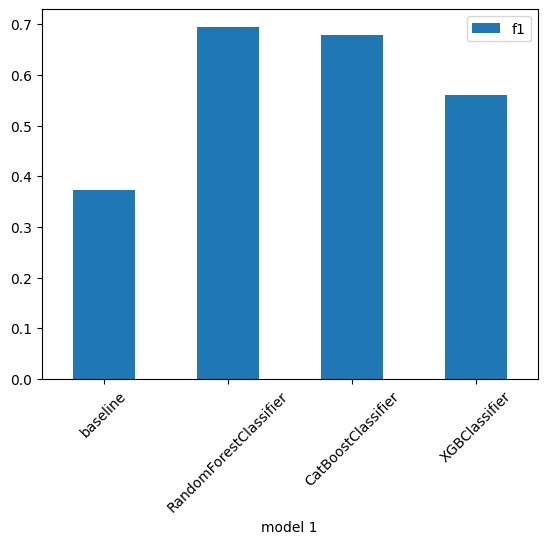

In [294]:
df_by_group.plot.bar(x='model 1',y='f1',rot=0)
plt.xticks(rotation=45)

In [260]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

In [302]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# (참고) warning 제거를 위한 코드
np.seterr(divide='ignore', invalid='ignore')

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='mean'),
     RandomForestClassifier(n_estimators=100, random_state=42)
)

# 5-fold 교차검증을 수행합니다.
k = 5
scores = cross_val_score(pipe, X_train, y_train, cv=k, scoring=make_scorer(f1_score,average ='weighted'))

print(f'f1 ({k} folds):', scores)

f1 (5 folds): [0.64729627 0.6919973  0.68725693 0.68272027 0.69757024]


In [303]:
scores.mean()

0.6813682010473587

In [304]:
scores.std()

0.017736321340533073

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {'fold1': ['fold1', 'fold2', 'fold3', 'fold4', 'fold5'], 'f1': [0.64729627 ,0.6919973,  0.68725693, 0.68272027, 0.69757024]}
df_by_fold = pd.DataFrame(data=data)

<Axes: xlabel='fold1'>

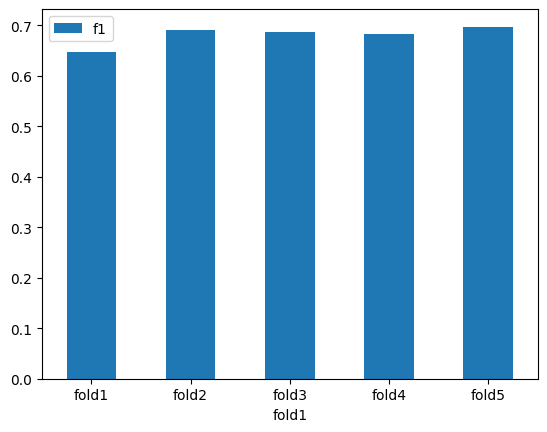

In [307]:
df_by_fold.plot.bar(x='fold1',y='f1',rot=0)

In [268]:
train, test = train_test_split(naver_shop, train_size=0.7, stratify=naver_shop[target], random_state=2)
X_train, y_train = divide_data(train)
X_test, y_test = divide_data(test)

In [308]:
from sklearn.ensemble import RandomForestClassifier

def fit_rf(X_train, y_train):
    pipe = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),  
        RandomForestClassifier(n_estimators=100, random_state=42)
    )

    pipe.fit(X_train, y_train)

    return pipe

In [309]:
processor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)

res_clf = RandomForestClassifier(n_estimators=100, random_state=42)

res_clf.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

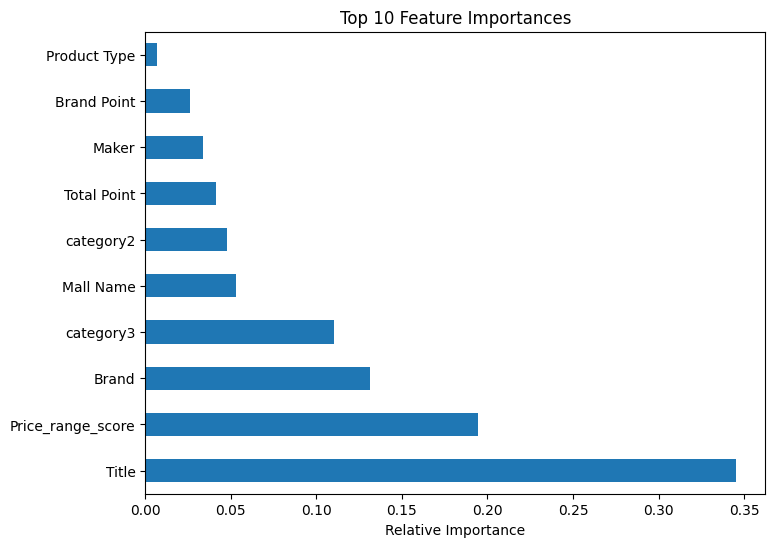

In [311]:
importances = res_clf.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

In [284]:
X_train.columns

Index(['Title', 'Mall Name', 'Product Type', 'Maker', 'Brand', 'category1',
       'category2', 'category3', 'Maker Point', 'Brand Point',
       'Price_range_score', 'Total Point'],
      dtype='object')

In [275]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_by_feature = pd.DataFrame(columns=['Low price',
'Price_range_score',
'Brand',
'category3',
'Title',
'category2',
'maker',
'Total Point',
'Mall Name',
'Maker Point',
'category1',
'Product Type'
])

In [276]:
row = [ 4.66231432,  2.12778935,  0.36930267,  2.27832302,  5.94121342,
        0.51951883,  4.74129851,  7.37384005,  0.18698824,  1.86691619,
       67.342406  ,  2.59008939]
row.sort(reverse=True)

In [277]:
df_by_feature = df_by_feature.append(pd.Series(row, index=df_by_feature.columns), ignore_index=True)

In [278]:
df_by_feature = df_by_feature.T

In [279]:
df_by_feature = df_by_feature.reset_index()

In [280]:
df_by_feature

,index,0
0,Low price,67.342406
1,Price_range_score,7.373840
2,Brand,5.941213
3,category3,4.741299
4,Title,4.662314
5,category2,2.590089
6,maker,2.278323
7,Total Point,2.127789
8,Mall Name,1.866916
9,Maker Point,0.519519


<Axes: xlabel='0', ylabel='index'>

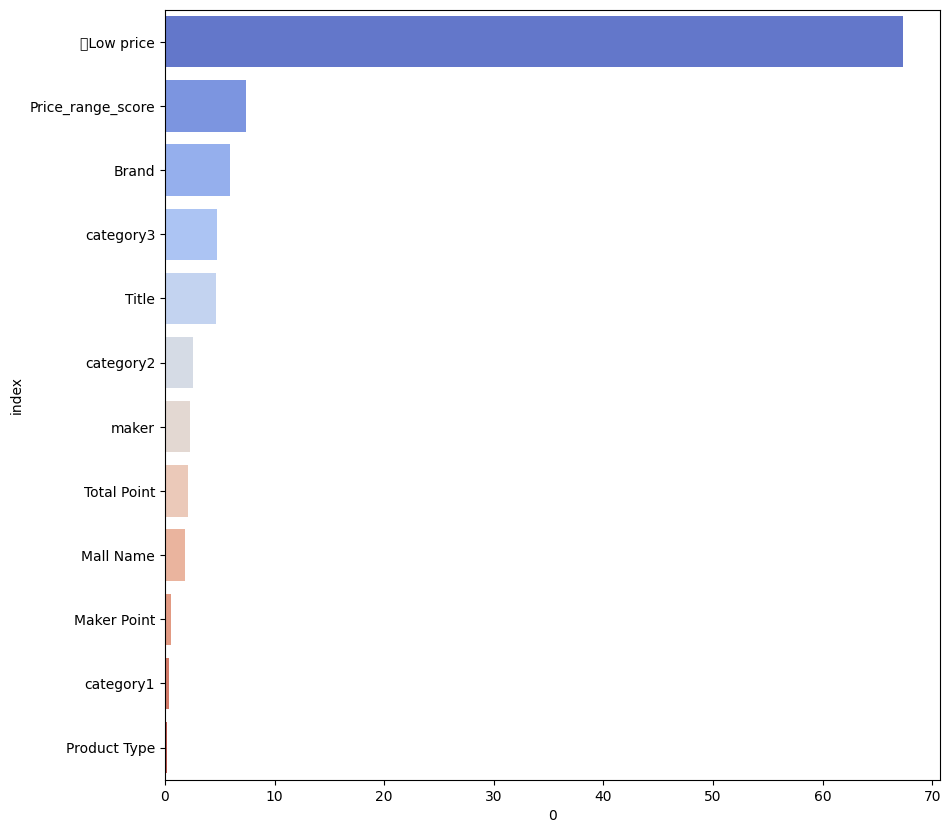

In [281]:
plt.figure(figsize=(10, 10))
sns.barplot(x=0,y='index',data=df_by_feature,palette=sns.color_palette('coolwarm',12))